In [6]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [7]:
# Load exit data
runDir = '../rundata/straussunits/'
fName = 'agt0'
rawData = np.loadtxt(runDir + fName + '.csv', delimiter = ',')

# Parse out the coordinates, energies and times
exitData = {'r': rawData[:,0], 'th': 180.0 / np.pi * rawData[:,1], 'ph': 180.0 / np.pi * rawData[:,2], 'ek': rawData[:,3], 's': rawData[:,4] * 3.75e5/ (24.0 * 3600.0)}

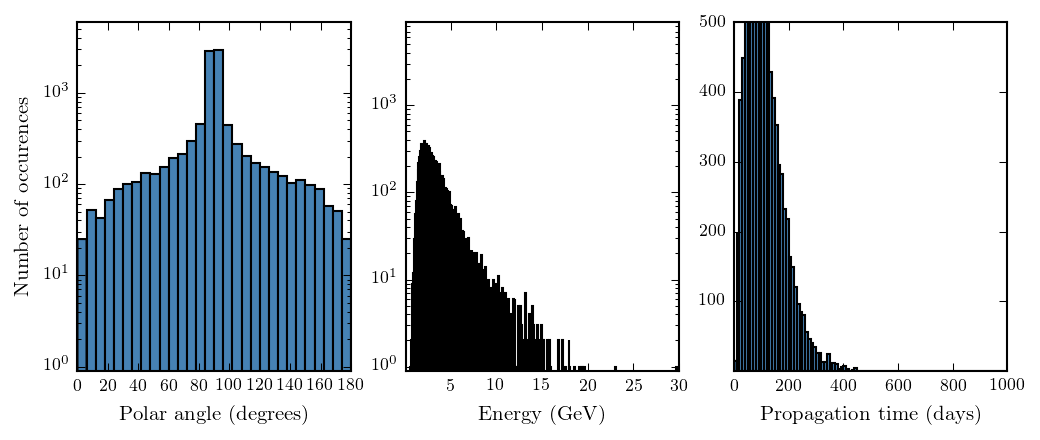

In [11]:
# Create figure for plotting polar angle, energy and time at exit
fig = plt.figure(figsize = (8, 3))
thAx = fig.add_subplot(1, 3, 1)
ekAx = fig.add_subplot(1, 3, 2)
sAx = fig.add_subplot(1, 3, 3)

# Fill the histograms
thAx.hist(exitData['th'], bins = np.arange(0.0, 180.0 + 6.0, 6.0), log = True)
ekAx.hist(exitData['ek'], bins = np.arange(0.0, 3.0 + 0.1, 0.1), log = True)
sMin = 0.0
sMax = 1000.0
sWidth = 10.0
sAx.hist(exitData['s'], bins = np.arange(sMin, sMax, sWidth))

# Set up axes and labels
thAx.set_ylim(0.9, 6000.0)
ekAx.set_ylim(0.9, 9000.0)
sAx.set_ylim(0.9, 500.0)
thAx.set_ylabel('Number of occurences')
ekAx.set_xlim(0.1, 3.0)
ekAx.set_xlabel('Energy (GeV)')
thAx.set_xlim(0.0, 180.0)
thAx.set_xlabel('Polar angle (degrees)')
sAx.set_xlim(0.0, 1000.0)
sAx.set_xlabel('Propagation time (days)')

plt.show()

In [55]:
# Get expected propagation time
sCounts, sBins = np.histogram(exitData['s'], bins = np.arange(sMin, sMax, sWidth))
# Get probabilities for each bin
sProbs = (sCounts + 0.0) / len(exitData['s'])
# Get bin centers
sBins = sBins[1:]
sBins -= sWidth / 2.0

propTime = sum(t * p for t, p in zip(sBins, sProbs))

print('Expected propagation time: ' + str(propTime) + ' days')

Expected propagation time: 251.1885 days
